# <center> Final Assignment for the Course "Explonatory Data Analysis for Machine Learning" as Part of the IBM Machine Learning Professional Certificate
### <center>Yulia Shutko

### Here I will use a data "Fast Food Restaurants in US" from the Kaggle.com

In [1]:
# import all necessary libraries 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"
us_html = requests.get(url).text
dataframe_list = pd.read_html(url,flavor='bs4')
print(len(dataframe_list))

15


In [3]:
us_data = dataframe_list[4]
us_data = pd.DataFrame(us_data)
us_data.head()

,2020rank,City,State[c],2020census,2010census,Change,2020 land area,2020 land area.1,2020 population density,2020 population density.1,Location
0,1,New York[d],New York,8804190,8175133,+7.69%,300.5 sq mi,778.3 km2,"29,298/sq mi","11,312/km2",".mw-parser-output .geo-default,.mw-parser-outp..."
1,2,Los Angeles,California,3898747,3792621,+2.80%,469.5 sq mi,"1,216.0 km2","8,304/sq mi","3,206/km2",34°01′N 118°25′W﻿ / ﻿34.01°N 118.41°W
2,3,Chicago,Illinois,2746388,2695598,+1.88%,227.7 sq mi,589.7 km2,"12,061/sq mi","4,657/km2",41°50′N 87°41′W﻿ / ﻿41.83°N 87.68°W
3,4,Houston,Texas,2304580,2099451,+9.77%,640.4 sq mi,"1,658.6 km2","3,599/sq mi","1,390/km2",29°47′N 95°23′W﻿ / ﻿29.78°N 95.39°W
4,5,Phoenix,Arizona,1608139,1445632,+11.24%,518.0 sq mi,"1,341.6 km2","3,105/sq mi","1,199/km2",33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W


In [4]:
us_data.shape

(326, 11)

In [5]:
us_data.columns

Index(['2020rank', 'City', 'State[c]', '2020census', '2010census', 'Change',
       '2020 land area', '2020 land area.1', '2020 population density',
       '2020 population density.1', 'Location'],
      dtype='object')

In [6]:
us_data.dtypes

2020rank                      int64
City                         object
State[c]                     object
2020census                    int64
2010census                    int64
Change                       object
2020 land area               object
2020 land area.1             object
2020 population density      object
2020 population density.1    object
Location                     object
dtype: object

In [7]:
us_data = us_data.drop(['2020rank', 'State[c]', '2010census', 'Change',
       '2020 land area', '2020 population density', 'Location'], axis = 1)
us_data

,City,2020census,2020 land area.1,2020 population density.1
0,New York[d],8804190,778.3 km2,"11,312/km2"
1,Los Angeles,3898747,"1,216.0 km2","3,206/km2"
2,Chicago,2746388,589.7 km2,"4,657/km2"
3,Houston,2304580,"1,658.6 km2","1,390/km2"
4,Phoenix,1608139,"1,341.6 km2","1,199/km2"
...,...,...,...,...
321,Federal Way,101030,57.8 km2,"1,750/km2"
322,Clinton,100513,72.8 km2,"1,381/km2"
323,Edinburg,100243,115.8 km2,866/km2
324,Nampa,100200,86.8 km2,"1,155/km2"


In [8]:
us_data = us_data. rename(columns = {"2020census": "Population", "2020 land area.1": "Area (sq.km)", "2020 population density.1": "Population density (per sq.km)"})
us_data

,City,Population,Area (sq.km),Population density (per sq.km)
0,New York[d],8804190,778.3 km2,"11,312/km2"
1,Los Angeles,3898747,"1,216.0 km2","3,206/km2"
2,Chicago,2746388,589.7 km2,"4,657/km2"
3,Houston,2304580,"1,658.6 km2","1,390/km2"
4,Phoenix,1608139,"1,341.6 km2","1,199/km2"
...,...,...,...,...
321,Federal Way,101030,57.8 km2,"1,750/km2"
322,Clinton,100513,72.8 km2,"1,381/km2"
323,Edinburg,100243,115.8 km2,866/km2
324,Nampa,100200,86.8 km2,"1,155/km2"


In [9]:
us_data["City"] = us_data["City"]. str.replace("\[]", "")
us_data["Area (sq.km)"] = us_data["Area (sq.km)"].str.replace("km2", "")
us_data["Population density (per sq.km)"] = us_data["Population density (per sq.km)"].str.replace("/km2", "")
us_data

,City,Population,Area (sq.km),Population density (per sq.km)
0,New York[d],8804190,778.3,"11,312"
1,Los Angeles,3898747,"1,216.0","3,206"
2,Chicago,2746388,589.7,"4,657"
3,Houston,2304580,"1,658.6","1,390"
4,Phoenix,1608139,"1,341.6","1,199"
...,...,...,...,...
321,Federal Way,101030,57.8,"1,750"
322,Clinton,100513,72.8,"1,381"
323,Edinburg,100243,115.8,866
324,Nampa,100200,86.8,"1,155"


In [10]:
us_data["Area (sq.km)"] = us_data["Area (sq.km)"].str.strip()
us_data["Population density (per sq.km)"] = us_data["Population density (per sq.km)"].str.strip()

In [11]:
us_data["Area (sq.km)"] = [float(str(i).replace(",", "")) for i in us_data["Area (sq.km)"]]


In [12]:
us_data["Population density (per sq.km)"] = [float(str(i).replace(",", "")) for i in us_data["Population density (per sq.km)"]]

In [13]:
us_data

,City,Population,Area (sq.km),Population density (per sq.km)
0,New York[d],8804190,778.3,11312.0
1,Los Angeles,3898747,1216.0,3206.0
2,Chicago,2746388,589.7,4657.0
3,Houston,2304580,1658.6,1390.0
4,Phoenix,1608139,1341.6,1199.0
...,...,...,...,...
321,Federal Way,101030,57.8,1750.0
322,Clinton,100513,72.8,1381.0
323,Edinburg,100243,115.8,866.0
324,Nampa,100200,86.8,1155.0


In [14]:
us_data.dtypes

City                               object
Population                          int64
Area (sq.km)                      float64
Population density (per sq.km)    float64
dtype: object

In [15]:
# Load our file to data frame

filepath = "C:/Users/julia/Desktop/Coursera_Courses/05_IBM Machine Learning/01_Explonatory Data Analysis for Machine Learning/Final Assignment/Data/Fast_Food_Restaurants_US.csv"
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,address,categories,city,country,latitude,longitude,name,postalCode,province,websites
0,0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,https://locations.sonicdrivein.com/la/thibodau...
1,1,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA,https://locations.sonicdrivein.com/la/thibodau...
2,2,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,TN,"http://www.tacobell.com,https://locations.taco..."
3,3,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,TN,"http://www.arbys.com,https://locations.arbys.c..."
4,4,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,GA,http://www.steaknshake.com/locations/23851-ste...


In [16]:
# Initial exploration

df.shape

(10000, 11)

In [17]:
#  Names of all columns

df.columns

Index(['Unnamed: 0', 'address', 'categories', 'city', 'country', 'latitude',
       'longitude', 'name', 'postalCode', 'province', 'websites'],
      dtype='object')

In [18]:
# Types of our columns

df.dtypes

Unnamed: 0      int64
address        object
categories     object
city           object
country        object
latitude      float64
longitude     float64
name           object
postalCode     object
province       object
websites       object
dtype: object

In [19]:
# Here we can see how much missed values we have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   address     10000 non-null  object 
 2   categories  10000 non-null  object 
 3   city        10000 non-null  object 
 4   country     10000 non-null  object 
 5   latitude    10000 non-null  float64
 6   longitude   10000 non-null  float64
 7   name        10000 non-null  object 
 8   postalCode  10000 non-null  object 
 9   province    10000 non-null  object 
 10  websites    10000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


In [20]:
duplicate = df[df.duplicated()]

duplicate

,Unnamed: 0,address,categories,city,country,latitude,longitude,name,postalCode,province,websites


In [21]:
# For further exploration we dont need some columns

df = df.drop(["Unnamed: 0", "websites"], axis = 1)
df

,address,categories,city,country,latitude,longitude,name,postalCode,province
0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA
1,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA
2,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,TN
3,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,TN
4,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,GA
...,...,...,...,...,...,...,...,...,...
9995,3460 Robinhood Rd,Fast Food Restaurants,Winston-Salem,US,36.117563,-80.316553,Pizza Hut,27106,NC
9996,3069 Kernersville Rd,Fast Food Restaurants,Winston-Salem,US,36.077718,-80.176748,Pizza Hut,27107,NC
9997,838 S Main St,Fast Food Restaurants,Kernersville,US,36.111015,-80.089165,Pizza Hut,27284,NC
9998,1702 Glendale Dr SW,Fast Food Restaurants,Wilson,US,35.719981,-77.945795,Pizza Hut,27893,NC


In [22]:
df["name"] = df["name"].str.replace("'", '')

df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province
0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA
1,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA
2,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,TN
3,3652 Parkway,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arbys,37863,TN
4,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak n Shake,30260,GA


In [23]:
df["name"] = df["name"].str.replace("-", ' ')
df["name"]=df["name"].str.title()
df["name"].head(30)

0             Sonic Drive In
1             Sonic Drive In
2                  Taco Bell
3                      Arbys
4              Steak N Shake
5                     Wendys
6                Burger King
7     Chipotle Mexican Grill
8                   7 Eleven
9                Dairy Queen
10               Dairy Queen
11               Dairy Queen
12                  Mr. Hero
13              Golden Chick
14                  Carls Jr
15                  Checkers
16                    Rallys
17                     Togos
18                    Rallys
19                  Checkers
20                    Rallys
21                  Checkers
22                  Checkers
23                  Checkers
24          Little Q Hot Pot
25                 Mcdonalds
26                 Mcdonalds
27                 Mcdonalds
28                 Mcdonalds
29                 Mcdonalds
Name: name, dtype: object

In [24]:
# Find our how much unique restaurat' names we have

unique_rest=df["name"].nunique()
unique_rest

544

In [25]:
# And how much cities do we have in our Data Frame

unique_rest=df["city"].nunique()
unique_rest

2764

In [26]:
pop_rest = df["name"]
pop_rest = pop_rest.value_counts()
pop_rest = pd.DataFrame(pop_rest) # convert our result to data frame
pop_rest = pop_rest.reset_index()
pop_rest.columns = ["Fastfood Restaurants", "Total number in US"] # and rename columns
pop_rest.head(30)

,Fastfood Restaurants,Total number in US
0,Mcdonalds,1948
1,Taco Bell,1032
2,Subway,833
3,Burger King,833
4,Arbys,666
5,Wendys,628
6,Jack In The Box,331
7,Pizza Hut,230
8,Chick Fil A,228
9,Dairy Queen,218


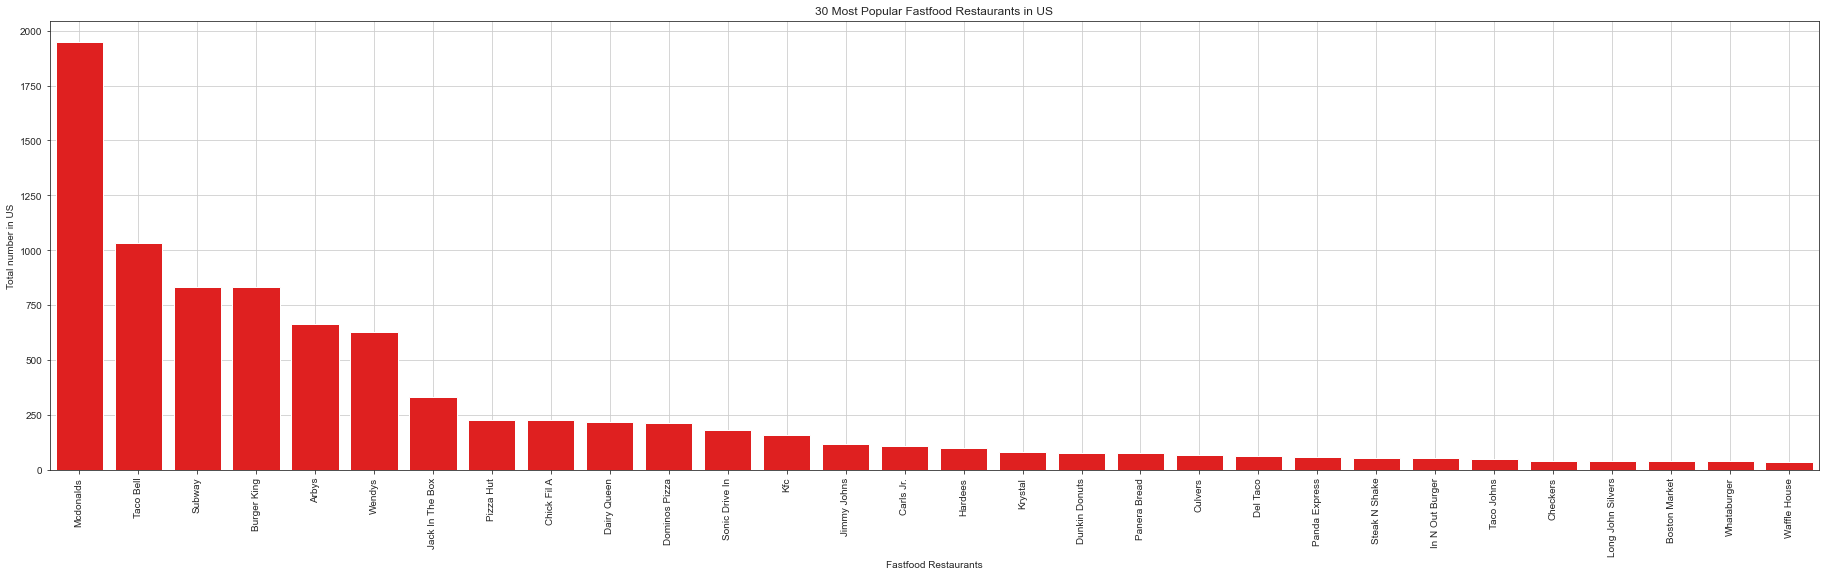

In [27]:
# Here we want visualyse our findings

sns.set_style('ticks')
fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(31.7, 8.27)
sns. barplot (x = pop_rest["Fastfood Restaurants"].head(30), y = pop_rest["Total number in US"]. head (30), data = pop_rest,color = "red")
plt.grid()
plt.xticks(rotation='vertical')
plt.xlabel("Fastfood Restaurants")
plt.ylabel("Total number in US")
plt.title("30 Most Popular Fastfood Restaurants in US") # You can comment this line out if you don't need title
plt.show(fig)



### In which city there are lagerst amount of Fast Food Restaurants

In [28]:
# First we group by city and covert it to data frame

cities1=df.groupby("city").count()
cities1 = pd.DataFrame(cities1)
cities1 = cities1.reset_index()
cities1.rename(columns={'city': 'City', 'name': 'Total Amount of Fastfood Restaurant'}, inplace=True)

cities1

,City,address,categories,country,latitude,longitude,Total Amount of Fastfood Restaurant,postalCode,province
0,Aberdeen,6,6,6,6,6,6,6,6
1,Abilene,6,6,6,6,6,6,6,6
2,Abingdon,3,3,3,3,3,3,3,3
3,Abington,1,1,1,1,1,1,1,1
4,Acton,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
2759,Zachary,1,1,1,1,1,1,1,1
2760,Zanesville,4,4,4,4,4,4,4,4
2761,Zebulon,1,1,1,1,1,1,1,1
2762,Zeeland,1,1,1,1,1,1,1,1


In [29]:
# Here we get to 10 cities with the highest number of restaurants

cities_sorted = cities1.sort_values("Total Amount of Fastfood Restaurant", ascending = False).reset_index(drop = True)


cities_sorted = cities_sorted. head(30)
cities_sorted 

,City,address,categories,country,latitude,longitude,Total Amount of Fastfood Restaurant,postalCode,province
0,Houston,107,107,107,107,107,107,107,107
1,Las Vegas,82,82,82,82,82,82,82,82
2,Phoenix,78,78,78,78,78,78,78,78
3,Columbus,72,72,72,72,72,72,72,72
4,Dallas,66,66,66,66,66,66,66,66
5,Orlando,65,65,65,65,65,65,65,65
6,Los Angeles,64,64,64,64,64,64,64,64
7,Miami,62,62,62,62,62,62,62,62
8,Chicago,57,57,57,57,57,57,57,57
9,San Antonio,54,54,54,54,54,54,54,54


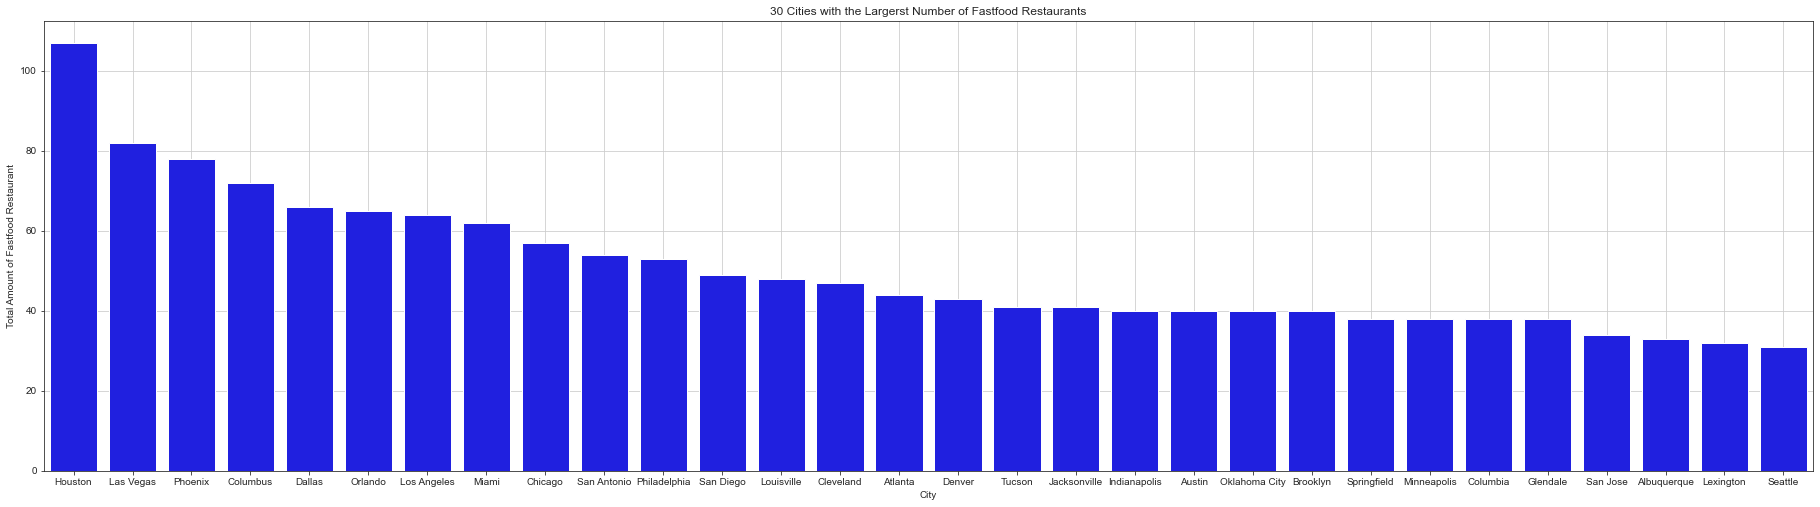

In [30]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(31.7, 8.27)
sns. barplot (x = cities_sorted["City"].head(30), y = cities_sorted["Total Amount of Fastfood Restaurant"]. head (30), data = pop_rest,color = "blue")
plt.grid()
plt.xlabel("City")
plt.ylabel("Total Amount of Fastfood Restaurant")
plt.title("30 Cities with the Largerst Number of Fastfood Restaurants")
plt.show(fig)


### Which Fastfood Reastaurants are Most Popular in These Cities

In [31]:
# First we make list of 10 Top Cities

top10_cities_list = cities_sorted["City"]. to_list()
top10_cities_list

['Houston',
 'Las Vegas',
 'Phoenix',
 'Columbus',
 'Dallas',
 'Orlando',
 'Los Angeles',
 'Miami',
 'Chicago',
 'San Antonio',
 'Philadelphia',
 'San Diego',
 'Louisville',
 'Cleveland',
 'Atlanta',
 'Denver',
 'Tucson',
 'Jacksonville',
 'Indianapolis',
 'Austin',
 'Oklahoma City',
 'Brooklyn',
 'Springfield',
 'Minneapolis',
 'Columbia',
 'Glendale',
 'San Jose',
 'Albuquerque',
 'Lexington',
 'Seattle']

In [32]:
# From oroginal data frame we make new one with top 10

top10_cities = df[df["city"].isin(top10_cities_list)].reset_index(drop = True)
top10_cities

,address,categories,city,country,latitude,longitude,name,postalCode,province
0,6316 W 89th St,Fast Food,Los Angeles,US,33.955923,-118.396443,Togos,90045,CA
1,1611 Broadway,Fast Food,Brooklyn,US,40.685506,-73.914457,Checkers,11207,NY
2,660 Liberty St,Fast Food,Springfield,US,42.121930,-72.584242,Mcdonalds,1104,MA
3,360 Main St,Fast Food Restaurants,Springfield,US,42.091561,-72.579647,Mcdonalds,1105,MA
4,2392 Main St,Fast Food Restaurants,Springfield,US,42.111552,-72.603359,Mcdonalds,1107,MA
...,...,...,...,...,...,...,...,...,...
1510,2529 Oak Lawn Ave,Fast Food Restaurants,Dallas,US,32.805002,-96.813570,7 Eleven,75219,TX
1511,407 N Lamar St,Fast Food Restaurants,Dallas,US,32.781360,-96.805390,Mcdonalds,75202,TX
1512,2945 Buckner Blvd,Fast Food Restaurant,Dallas,US,32.809238,-96.684639,Sonic,75228,TX
1513,8390 N Stemmons Fwy,Fast Food Restaurants,Dallas,US,32.826350,-96.871290,Mcdonalds,75247,TX


In [33]:
# Sorting our list in descending order
top10_cities.groupby("city").count().sort_values("name", ascending = False)

,address,categories,country,latitude,longitude,name,postalCode,province
city,,,,,,,,
Houston,107,107,107,107,107,107,107,107
Las Vegas,82,82,82,82,82,82,82,82
Phoenix,78,78,78,78,78,78,78,78
Columbus,72,72,72,72,72,72,72,72
Dallas,66,66,66,66,66,66,66,66
Orlando,65,65,65,65,65,65,65,65
Los Angeles,64,64,64,64,64,64,64,64
Miami,62,62,62,62,62,62,62,62
Chicago,57,57,57,57,57,57,57,57


In [34]:
# Use one-hot encoding to see in which city there are which restaurants
# one hot encodin
cities_onehot = pd.get_dummies(top10_cities[['name']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cities_onehot['city'] = top10_cities['city'] 

# move neighborhood column to the first column
fixed_columns = [cities_onehot.columns[-1]] + list(cities_onehot.columns[:-1])
cities_onehot = cities_onehot[fixed_columns]

cities_onehot.head()

,city,7 Eleven,90 Miles Cuban Cafe,Acropolis Gyro Palace,Andys Frozen Custard,Arbys,Arbys Closed,Au Bon Pain,Backyard Grill,Band Box Diner,...,Walmart Supercenter,Wawa,Wendys,West Point Pizza,Whataburger,White Castle,Wienerschnitzel,Wingstop,Wise Guys A Chicago Eatery,Zios Italian Kitchen
0,Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Brooklyn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Springfield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Springfield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Springfield,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Here we create function to indentify which restaurants are most popular in our cities

city_rest = cities_onehot.groupby('city').mean().reset_index()
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Popular Fastfood Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Popular Fastfood Restaurant'.format(ind+1))

# create a new dataframe
cities_sorted = pd.DataFrame(columns=columns)
cities_sorted['city'] = city_rest['city']

for ind in np.arange(city_rest.shape[0]):
    cities_sorted.iloc[ind, 1:] = return_most_common_venues(city_rest.iloc[ind, :], num_top_venues)

cities_sorted

,city,1st Most Popular Fastfood Restaurant,2nd Most Popular Fastfood Restaurant,3rd Most Popular Fastfood Restaurant,4th Most Popular Fastfood Restaurant,5th Most Popular Fastfood Restaurant,6th Most Popular Fastfood Restaurant,7th Most Popular Fastfood Restaurant,8th Most Popular Fastfood Restaurant,9th Most Popular Fastfood Restaurant,10th Most Popular Fastfood Restaurant
0,Albuquerque,Mcdonalds,Taco Bell,Blakes Lotaburger,Churchs Chicken,Pizza Hut,Wendys,Sonic Drive In,Subway¬Æ,Subway,T Mobile
1,Atlanta,Mcdonalds,Wendys,Dairy Queen,Chick Fil A,Pizza Hut,Subway,Taco Bell,Chipotle Mexican Grill,Great Wraps,Dunkin Donuts
2,Austin,Jack In The Box,Subway,Panda Express,Golden Chick,Taco Bell,Wendys,Mcdonalds,Arbys,Churchs Chicken,Pei Wei
3,Brooklyn,Mcdonalds,Subway,Dominos Pizza,Kfc,Wendys,Dunkin Donuts,Mc Donalds,Kfc Kentucky Fried Chicken,Subway¬Æ,Nathans Famous
4,Chicago,Subway,Burger King,Dunkin Donuts,Jimmy Johns,Wendys,Mcdonalds,Dominos Pizza,7 Eleven,Nicks Gyros,Sunrise Gyros
5,Cleveland,Mcdonalds,Subway,Rallys,Dominos Pizza,Kfc,Burger King,Jimmy Johns,Arbys,Wendys,Sonic Drive In
6,Columbia,Taco Bell,Subway,Mcdonalds,Arbys,Chick Fil A,Wendys,Burger King,Bob Evans,Sarku Japan,Panera Bread
7,Columbus,Taco Bell,Mcdonalds,Arbys,Subway,Chick Fil A,Kfc,White Castle,Wendys,Steak N Shake,Rallys
8,Dallas,Jack In The Box,Mcdonalds,Taco Bell,Wendys,Dominos Pizza,Subway,Burger King,Wingstop,Pizza Hut,Jimmy Johns
9,Denver,Taco Bell,Subway,Mcdonalds,Wendys,Jimmy Johns,Arbys,Panda Express,Sonic Drive In,Burger King,Jack In The Box


In [36]:
# here we set our index to city to sort our list in descending order

cities_sorted.set_index("city", inplace = True)
top10_cities_rates = cities_sorted.reindex(top10_cities_list)
top10_cities_rates

,1st Most Popular Fastfood Restaurant,2nd Most Popular Fastfood Restaurant,3rd Most Popular Fastfood Restaurant,4th Most Popular Fastfood Restaurant,5th Most Popular Fastfood Restaurant,6th Most Popular Fastfood Restaurant,7th Most Popular Fastfood Restaurant,8th Most Popular Fastfood Restaurant,9th Most Popular Fastfood Restaurant,10th Most Popular Fastfood Restaurant
city,,,,,,,,,,
Houston,Mcdonalds,Jack In The Box,Burger King,Wendys,Subway,Panda Express,Dominos Pizza,Boston Market,Chick Fil A,Jamba Juice
Las Vegas,Mcdonalds,Taco Bell,Jack In The Box,Panda Express,Carls Jr.,Del Taco,Port Of Subs,Wendys,Arbys,In N Out Burger
Phoenix,Mcdonalds,Taco Bell,Jack In The Box,Dominos Pizza,Arbys,Carls Jr.,Burger King,Whataburger,Wendys,Del Taco
Columbus,Taco Bell,Mcdonalds,Arbys,Subway,Chick Fil A,Kfc,White Castle,Wendys,Steak N Shake,Rallys
Dallas,Jack In The Box,Mcdonalds,Taco Bell,Wendys,Dominos Pizza,Subway,Burger King,Wingstop,Pizza Hut,Jimmy Johns
Orlando,Mcdonalds,Taco Bell,Arbys,Wendys,Chick Fil A,Dunkin Donuts,Subway,Steak N Shake,Burger King,Krystal
Los Angeles,Jack In The Box,Burger King,Mcdonalds,Pizza Hut,Taco Bell,Baskin Robbins,Chick Fil A,Carls Jr.,Subway,Chipotle Mexican Grill
Miami,Mcdonalds,Taco Bell,Burger King,Subway,Kfc,Pizza Hut,Arbys,Chicken Kitchen,Pollo Tropical,Dunkin Donuts
Chicago,Subway,Burger King,Dunkin Donuts,Jimmy Johns,Wendys,Mcdonalds,Dominos Pizza,7 Eleven,Nicks Gyros,Sunrise Gyros
